**webscraping**

check 


1.   wesite.com/robots.txt before scraping
2.   if there is a public api available
3.   not good to scrape beyond authentication. Better scrape publicly available data


In [ ]:
from bs4 import BeautifulSoup
import requests

In [ ]:
response = requests.get("https://news.ycombinator.com/")

In [ ]:
response

In [ ]:
webPage = response.text  
webPage 

In [ ]:
soup = BeautifulSoup(webPage, "html.parser")
print(soup.title)

In [ ]:
print(soup.prettify())

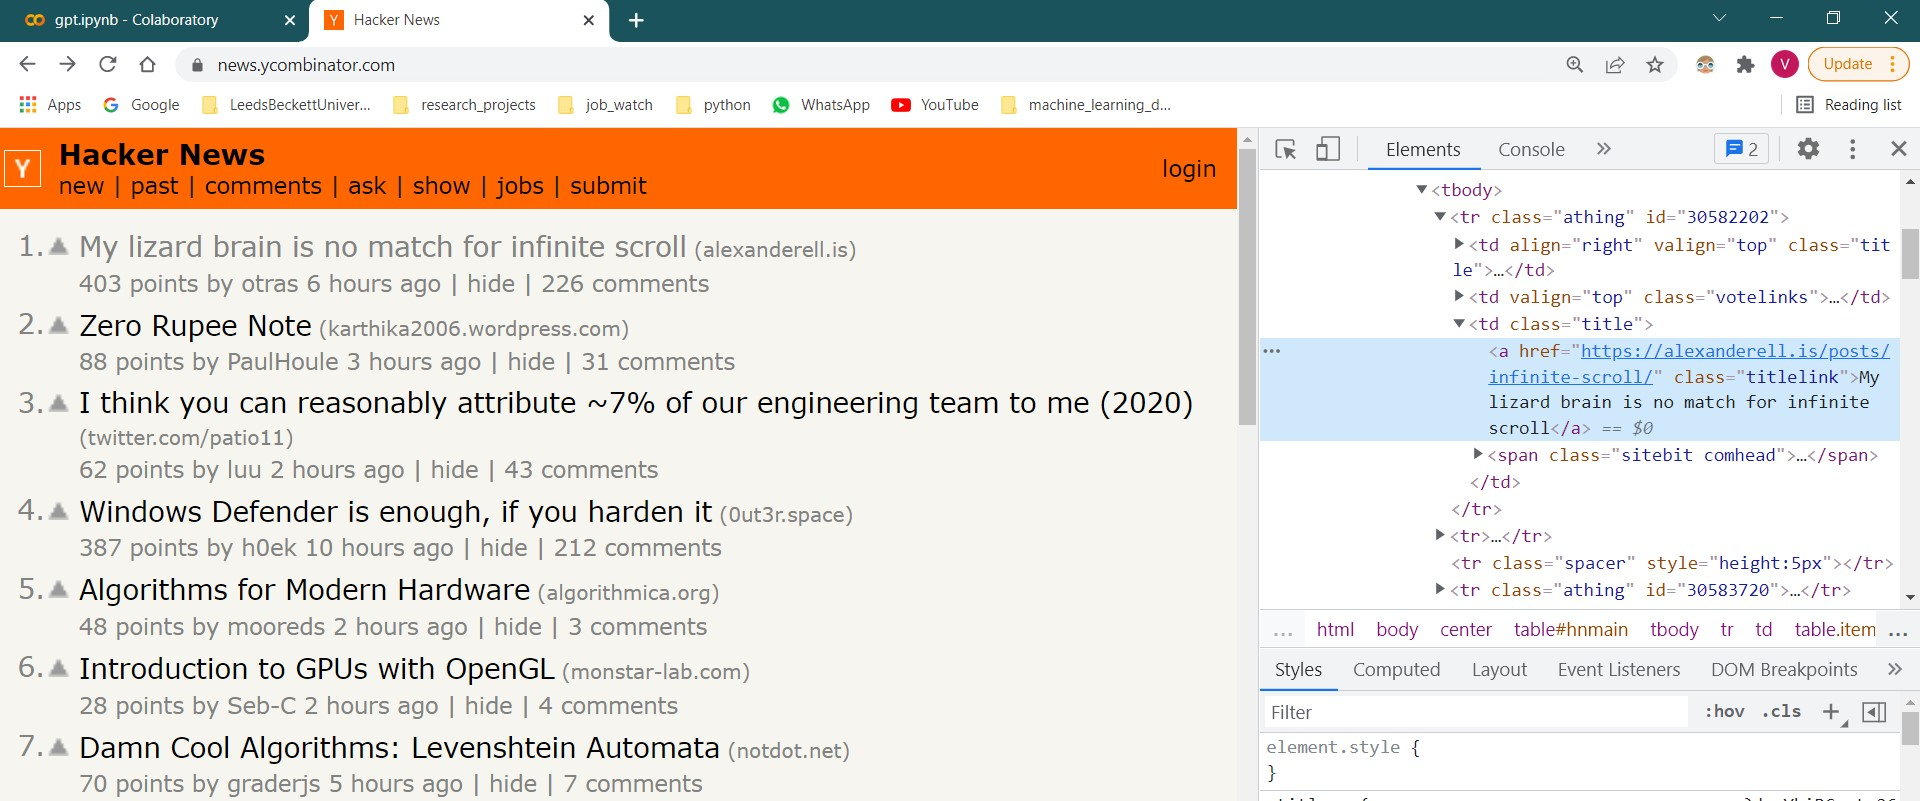

In [ ]:
article_tag = soup.find(name = 'a', class_ = 'titlelink')
article_text = article_tag.getText()
article_link = article_tag.get('href')
article_upvote = soup.find(name='span', class_= 'score').getText()
print(article_tag)
print(article_text)
print(article_link)
print(article_upvote)

In [ ]:
## to get a list of articles
article_texts, article_links = [],[]
articles = soup.find_all(name = 'a', class_ = 'titlelink')

for article_tag in articles:
  text = article_tag.getText()
  article_texts.append(text)
  link = article_tag.get("href")
  article_links.append(link)

In [ ]:
set(zip(article_texts,article_links))

In [ ]:
# article upvotes
article_upvotes = [score.getText() for score in soup.find_all(name='span', class_='score')]
article_upvotes

In [ ]:
article_upvotes = [int(score.getText().split()[0]) for score in soup.find_all(name='span', class_='score')]
article_upvotes

In [ ]:
urlLink = 'https://www.amazon.in/Dell-15-6-inch-i5-10300H-NVIDIA1650-Graphics/dp/B08BZQMPFK/ref=sr_1_2?crid=2KOKOWWB7HJ7E&keywords=laptops&qid=1646664048&refinements=p_89%3ADell%2Cp_72%3A1318476031%2Cp_n_feature_eleven_browse-bin%3A7005057031%2Cp_n_condition-type%3A8609960031%2Cp_n_feature_seven_browse-bin%3A16757433031&rnid=7005020031&s=computers&sprefix=laptops%2Caps%2C457&sr=1-2'
# headers= {"Accept-Language":"en-US,en;q=0.9", 'Connection': 'keep-alive', 'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.102 Safari/537.36'}

In [ ]:
headers= {"Accept-Language":"en-US,en;q=0.9", 'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.102 Safari/537.36'}

# **Prize Tracker**
[link](https://www.amazon.in/Dell-15-6-inch-i5-10300H-NVIDIA1650-Graphics/dp/B08BZQMPFK/ref=sr_1_2?crid=2KOKOWWB7HJ7E&keywords=laptops&qid=1646664048&refinements=p_89%3ADell%2Cp_72%3A1318476031%2Cp_n_feature_eleven_browse-bin%3A7005057031%2Cp_n_condition-type%3A8609960031%2Cp_n_feature_seven_browse-bin%3A16757433031&rnid=7005020031&s=computers&sprefix=laptops%2Caps%2C457&sr=1-2)

In [51]:
from bs4 import BeautifulSoup
import requests
import lxml

In [ ]:
response = requests.get(url=urlLink, headers = headers)

In [ ]:
response

In [52]:
soup = BeautifulSoup(response.content,'lxml')

In [53]:
# print(soup.prettify())

In [54]:
price = soup.find(name = 'span', class_ = 'a-offscreen').getText().split('₹')[1].split('.')[0].split(',')
price

['85', '094']

In [55]:
s = ''
price = s.join(price)
price = int(price)

In [56]:
price

85094

In [58]:
import smtplib

In [ ]:
BUY_PRICE = 70000

if price < BUY_PRICE:
    message = f"your item is now {price}"

    with smtplib.SMTP(YOUR_SMTP_ADDRESS, port=587) as connection:
        connection.starttls()
        result = connection.login(YOUR_EMAIL, YOUR_PASSWORD)
        connection.sendmail(
            from_addr=YOUR_EMAIL,
            to_addrs=YOUR_EMAIL,
            msg=f"Subject:Amazon Price Alert!\n\n{message}\n{url}"
        )








